# 🎤 Meeting Time Tracker

Build a tool that analyzes meeting transcripts to show who talks the most and track speaking time distribution!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

print("📚 Libraries loaded successfully!")
print("🎤 Ready to analyze meeting transcripts!")

📚 Libraries loaded successfully!
🎤 Ready to analyze meeting transcripts!


In [2]:
meeting_transcript = """
John: Good morning everyone. I think we should start by focusing on the budget for this quarter. We need to review our current spending and see where we can optimize.

Sarah: That's a really good point, John. What's our current spend looking like? I've been tracking some numbers on my end but would love to see the full picture.

John: We're currently at $50,000 for this quarter, which is about 15% higher than last quarter. I believe we really need to cut costs in several areas, especially marketing and travel expenses.

Mike: I completely agree with John on this. The marketing spend seems excessive for the returns we're getting.

John: Exactly, Mike. Let me show you the detailed breakdown of where all this money is going. Marketing alone is taking up 40% of our budget, and I'm not sure we're seeing proportional results from those investments.

Emma: What about the customer acquisition costs? Are we tracking those properly?

Sarah: Emma raises a good question. I've been looking at our CAC metrics, and they do seem to be climbing. We should definitely factor that into our budget planning going forward.

John: Absolutely. The customer acquisition cost has increased by 25% compared to last quarter. This is exactly why I'm pushing for budget cuts. We need to be more strategic about our spending and focus on high-ROI activities only.

Mike: Makes sense. What specific areas should we cut first?

John: I recommend starting with the social media advertising budget. We're spending $15,000 monthly there with minimal conversion rates. Then we should look at reducing travel expenses and maybe renegotiate some of our software contracts.

Emma: What about the new product development budget? Should that be affected?

Sarah: I don't think we should touch product development. That's our future revenue stream. Maybe we can optimize the existing marketing channels instead of cutting everything.

John: Sarah makes a valid point about product development, but we still need to be realistic about our current financial situation. I suggest we reduce marketing by 30% and travel by 50%, which should give us the breathing room we need.

Mike: That sounds reasonable to me. When do we implement these changes?

Emma: I'm concerned about the impact on team morale if we cut too much too quickly.

John: Emma, I understand your concern, but we have to make tough decisions now to ensure long-term stability. I propose we implement these changes gradually over the next two months, starting with the biggest inefficiencies first.

Sarah: I agree with a gradual approach. We should also communicate clearly with the team about why these changes are necessary and how they support our long-term goals.

John: Perfect. I'll prepare a detailed implementation plan and share it with everyone by Friday. We'll also schedule follow-up meetings to track progress and make adjustments as needed.
"""

print("📄 Mock meeting transcript created!")
print("👥 Participants: John, Sarah, Mike, Emma")
print("🕒 Simulating a 30-minute budget planning meeting")
print(f"📝 Total transcript length: {len(meeting_transcript.split())} words")

📄 Mock meeting transcript created!
👥 Participants: John, Sarah, Mike, Emma
🕒 Simulating a 30-minute budget planning meeting
📝 Total transcript length: 471 words


In [3]:
def analyze_meeting_transcript(transcript):
    lines = transcript.strip().split('\n')
    
    speaker_stats = defaultdict(lambda: {'word_count': 0, 'speaking_turns': 0, 'words_per_turn': []})
    total_words = 0
    
    for line in lines:
        line = line.strip()
        if ':' in line and line:
            speaker, content = line.split(':', 1)
            speaker = speaker.strip()
            content = content.strip()
            
            words = len(content.split())
            speaker_stats[speaker]['word_count'] += words
            speaker_stats[speaker]['speaking_turns'] += 1
            speaker_stats[speaker]['words_per_turn'].append(words)
            total_words += words
    
    results = []
    for speaker, stats in speaker_stats.items():
        percentage = (stats['word_count'] / total_words) * 100 if total_words > 0 else 0
        avg_words_per_turn = np.mean(stats['words_per_turn']) if stats['words_per_turn'] else 0
        
        results.append({
            'Speaker': speaker,
            'Word_Count': stats['word_count'],
            'Speaking_Turns': stats['speaking_turns'],
            'Percentage': percentage,
            'Avg_Words_Per_Turn': avg_words_per_turn
        })
    
    df = pd.DataFrame(results)
    df = df.sort_values('Word_Count', ascending=False)
    
    return df, total_words

print("🔄 Analyzing meeting transcript...")

df_results, total_words = analyze_meeting_transcript(meeting_transcript)

print("✅ Analysis complete!")
print(f"\n📊 MEETING STATISTICS")
print("=" * 25)
print(f"Total words spoken: {total_words}")
print(f"Number of participants: {len(df_results)}")
print(f"Average words per person: {total_words // len(df_results)}")

print(f"\n🗣️ SPEAKING TIME BREAKDOWN")
print("=" * 30)

for _, row in df_results.iterrows():
    speaker = row['Speaker']
    word_count = int(row['Word_Count'])
    percentage = row['Percentage']
    turns = int(row['Speaking_Turns'])
    
    if percentage > 40:
        status = "🔴 Talks too much"
    elif percentage > 20:
        status = "✅ Good participation"
    elif percentage > 10:
        status = "🟡 Low participation"
    else:
        status = "🔴 Very low participation"
    
    print(f"{speaker}: {word_count} words ({percentage:.1f}%) - {turns} turns {status}")

print(df_results)

🔄 Analyzing meeting transcript...
✅ Analysis complete!

📊 MEETING STATISTICS
Total words spoken: 453
Number of participants: 4
Average words per person: 113

🗣️ SPEAKING TIME BREAKDOWN
John: 269 words (59.4%) - 8 turns 🔴 Talks too much
Sarah: 110 words (24.3%) - 4 turns ✅ Good participation
Mike: 37 words (8.2%) - 3 turns 🔴 Very low participation
Emma: 37 words (8.2%) - 3 turns 🔴 Very low participation
  Speaker  Word_Count  Speaking_Turns  Percentage  Avg_Words_Per_Turn
0    John         269               8   59.381898           33.625000
1   Sarah         110               4   24.282561           27.500000
2    Mike          37               3    8.167770           12.333333
3    Emma          37               3    8.167770           12.333333


⚖️ MEETING BALANCE ANALYSIS
Meeting Balance Score: 6.6/10
Status: 🟡 Good - Minor improvements needed


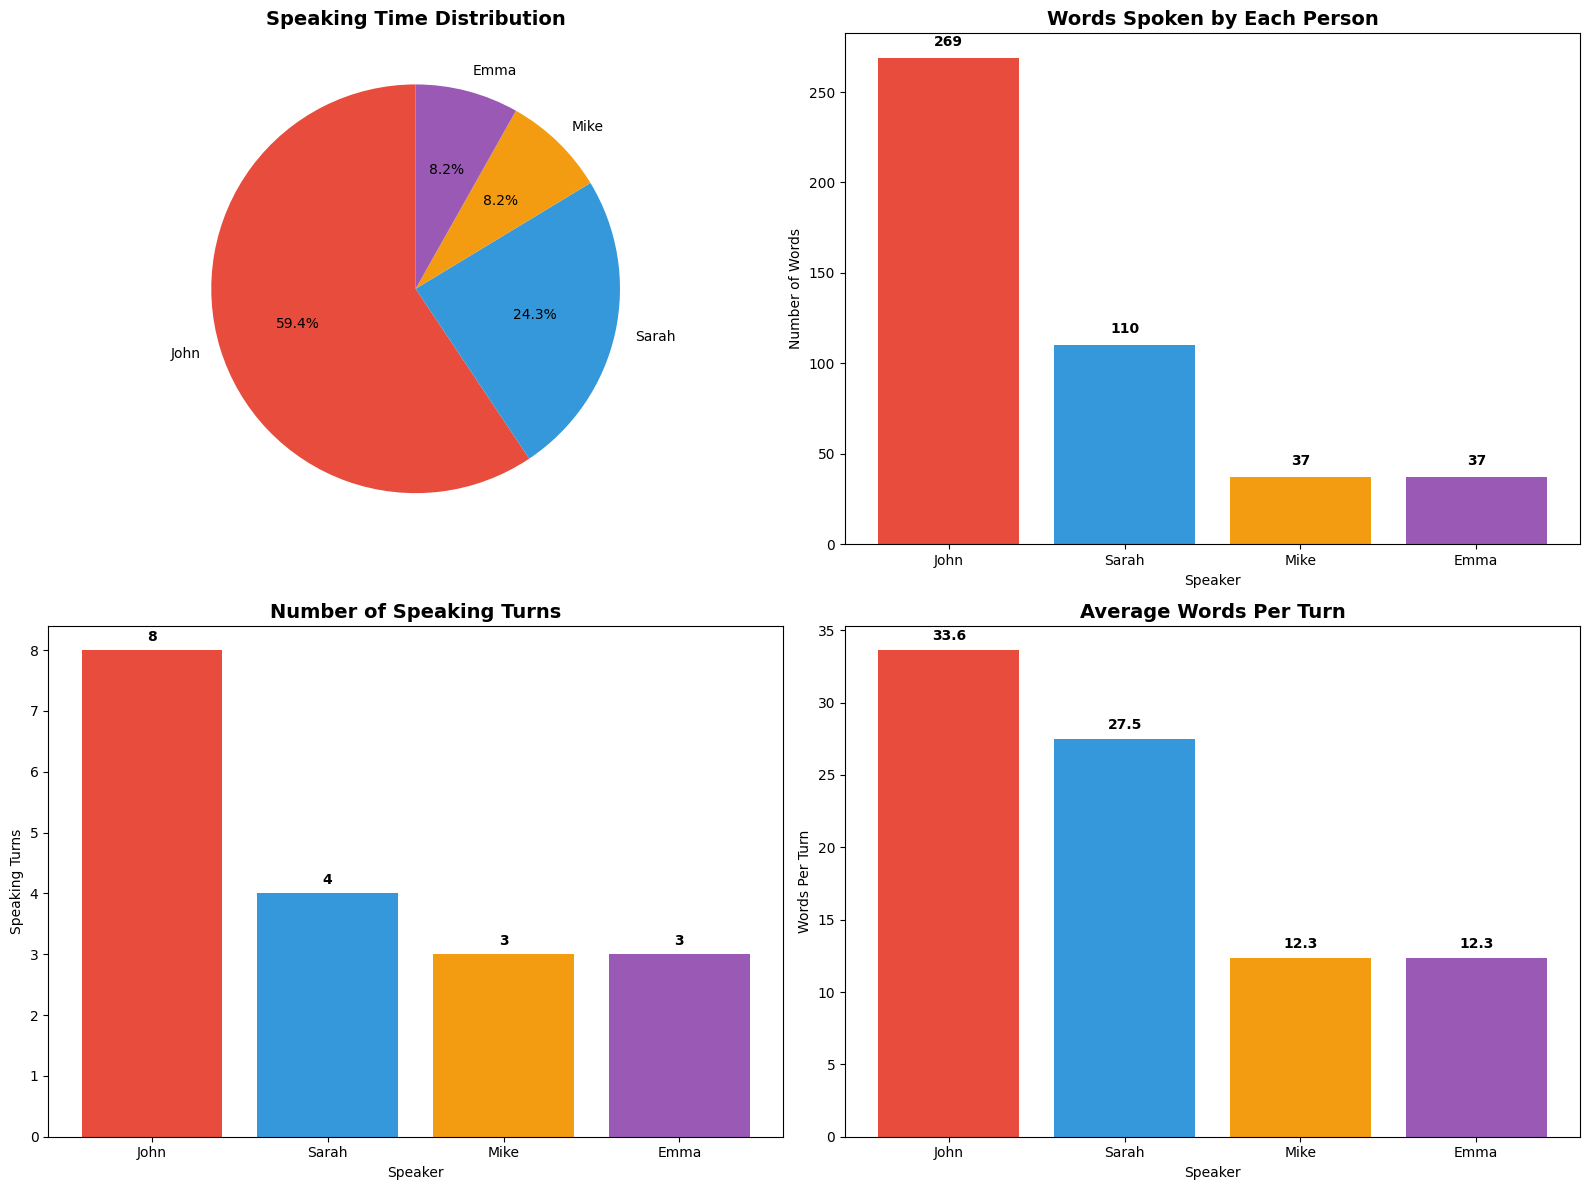

In [4]:
def calculate_meeting_balance_score(df):
    percentages = df['Percentage'].values
    
    ideal_percentage = 100 / len(df)
    
    deviations = [abs(p - ideal_percentage) for p in percentages]
    avg_deviation = np.mean(deviations)
    
    balance_score = max(0, 10 - (avg_deviation / 5))
    balance_score = min(10, balance_score)
    
    return balance_score

balance_score = calculate_meeting_balance_score(df_results)

print(f"⚖️ MEETING BALANCE ANALYSIS")
print("=" * 30)
print(f"Meeting Balance Score: {balance_score:.1f}/10")

if balance_score >= 8:
    balance_status = "🟢 Excellent - Well balanced meeting"
elif balance_score >= 6:
    balance_status = "🟡 Good - Minor improvements needed"
elif balance_score >= 4:
    balance_status = "🟠 Fair - Some participants dominating"
else:
    balance_status = "🔴 Poor - Meeting dominated by few speakers"

print(f"Status: {balance_status}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

colors = ['#e74c3c', '#3498db', '#f39c12', '#9b59b6']

ax1.pie(df_results['Word_Count'], labels=df_results['Speaker'], autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax1.set_title('Speaking Time Distribution', fontsize=14, fontweight='bold')

bars1 = ax2.bar(df_results['Speaker'], df_results['Word_Count'], color=colors)
ax2.set_title('Words Spoken by Each Person', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Words')
ax2.set_xlabel('Speaker')

for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

bars2 = ax3.bar(df_results['Speaker'], df_results['Speaking_Turns'], color=colors)
ax3.set_title('Number of Speaking Turns', fontsize=14, fontweight='bold')
ax3.set_ylabel('Speaking Turns')
ax3.set_xlabel('Speaker')

for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

bars3 = ax4.bar(df_results['Speaker'], df_results['Avg_Words_Per_Turn'], color=colors)
ax4.set_title('Average Words Per Turn', fontsize=14, fontweight='bold')
ax4.set_ylabel('Words Per Turn')
ax4.set_xlabel('Speaker')

for bar in bars3:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [5]:
def generate_meeting_recommendations(df, balance_score):
    recommendations = []
    
    dominant_speakers = df[df['Percentage'] > 40]
    quiet_speakers = df[df['Percentage'] < 15]
    
    if len(dominant_speakers) > 0:
        for _, speaker in dominant_speakers.iterrows():
            recommendations.append(f"🎤 {speaker['Speaker']} is dominating the conversation ({speaker['Percentage']:.1f}%). Consider facilitating more balanced discussion.")
    
    if len(quiet_speakers) > 0:
        quiet_names = ", ".join(quiet_speakers['Speaker'].tolist())
        recommendations.append(f"🤐 Encourage {quiet_names} to share more ideas and participate actively.")
    
    if balance_score < 5:
        recommendations.append("📋 Consider using structured discussion formats like round-robin to ensure everyone speaks.")
    
    avg_words_per_turn = df['Avg_Words_Per_Turn'].mean()
    if avg_words_per_turn > 30:
        recommendations.append("⏱️ Meeting has long speaking turns. Consider time-boxing individual contributions.")
    
    return recommendations

def analyze_speaking_patterns(df):
    patterns = {}
    
    for _, row in df.iterrows():
        speaker = row['Speaker']
        percentage = row['Percentage']
        turns = row['Speaking_Turns']
        avg_words = row['Avg_Words_Per_Turn']
        
        if percentage > 40:
            pattern = "Dominant Speaker"
        elif percentage > 25:
            pattern = "Active Participant"
        elif percentage > 15:
            pattern = "Moderate Participant"
        else:
            pattern = "Quiet Participant"
        
        if avg_words > 30:
            style = "Long-form speaker"
        elif avg_words > 15:
            style = "Balanced speaker"
        else:
            style = "Concise speaker"
        
        patterns[speaker] = {
            'pattern': pattern,
            'style': style,
            'engagement_level': 'High' if turns >= 5 else 'Medium' if turns >= 3 else 'Low'
        }
    
    return patterns

recommendations = generate_meeting_recommendations(df_results, balance_score)
patterns = analyze_speaking_patterns(df_results)

print(f"\n💡 MEETING RECOMMENDATIONS")
print("=" * 30)

if recommendations:
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
else:
    print("✅ Meeting is well-balanced! No major recommendations.")

print(f"\n👥 INDIVIDUAL SPEAKER ANALYSIS")
print("=" * 35)

for speaker, analysis in patterns.items():
    speaker_data = df_results[df_results['Speaker'] == speaker].iloc[0]
    print(f"\n🗣️ {speaker}:")
    print(f"   Pattern: {analysis['pattern']}")
    print(f"   Speaking Style: {analysis['style']}")
    print(f"   Engagement Level: {analysis['engagement_level']}")
    print(f"   Stats: {speaker_data['Word_Count']} words, {speaker_data['Speaking_Turns']} turns")

print(f"\n📈 MEETING EFFICIENCY METRICS")
print("=" * 32)

total_turns = df_results['Speaking_Turns'].sum()
avg_turn_length = df_results['Avg_Words_Per_Turn'].mean()
participation_rate = len(df_results[df_results['Percentage'] > 5]) / len(df_results) * 100

print(f"Total speaking turns: {total_turns}")
print(f"Average words per turn: {avg_turn_length:.1f}")
print(f"Active participation rate: {participation_rate:.1f}%")
print(f"Meeting balance score: {balance_score:.1f}/10")

if balance_score >= 8:
    efficiency = "Excellent"
elif balance_score >= 6:
    efficiency = "Good"
elif balance_score >= 4:
    efficiency = "Fair"
else:
    efficiency = "Poor"

print(f"Overall meeting efficiency: {efficiency}")


💡 MEETING RECOMMENDATIONS
1. 🎤 John is dominating the conversation (59.4%). Consider facilitating more balanced discussion.
2. 🤐 Encourage Mike, Emma to share more ideas and participate actively.

👥 INDIVIDUAL SPEAKER ANALYSIS

🗣️ John:
   Pattern: Dominant Speaker
   Speaking Style: Long-form speaker
   Engagement Level: High
   Stats: 269 words, 8 turns

🗣️ Sarah:
   Pattern: Moderate Participant
   Speaking Style: Balanced speaker
   Engagement Level: Medium
   Stats: 110 words, 4 turns

🗣️ Mike:
   Pattern: Quiet Participant
   Speaking Style: Concise speaker
   Engagement Level: Medium
   Stats: 37 words, 3 turns

🗣️ Emma:
   Pattern: Quiet Participant
   Speaking Style: Concise speaker
   Engagement Level: Medium
   Stats: 37 words, 3 turns

📈 MEETING EFFICIENCY METRICS
Total speaking turns: 18
Average words per turn: 21.4
Active participation rate: 100.0%
Meeting balance score: 6.6/10
Overall meeting efficiency: Good


In [6]:
def analyze_any_transcript(transcript_text):
    print("🔄 Analyzing your meeting transcript...")
    
    df, total_words = analyze_meeting_transcript(transcript_text)
    balance_score = calculate_meeting_balance_score(df)
    
    print(f"\n📊 QUICK RESULTS")
    print("=" * 20)
    print(f"Total words: {total_words}")
    print(f"Participants: {len(df)}")
    print(f"Balance score: {balance_score:.1f}/10")
    
    print(f"\n🏆 TOP SPEAKERS:")
    for i, (_, row) in enumerate(df.head(3).iterrows(), 1):
        emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
        print(f"{emoji} {row['Speaker']}: {row['Percentage']:.1f}% ({row['Word_Count']} words)")
    
    return df, balance_score

print("🧪 TEST THE MEETING ANALYZER")
print("=" * 30)

sample_transcript = """
Alice: Welcome everyone to today's project update meeting. Let's start by reviewing our progress.

Bob: Thanks Alice. I've completed the database setup and it's running smoothly. The performance metrics look good so far.

Charlie: Great work Bob. On my end, I'm about 80% done with the frontend development. Should be finished by end of week.

Alice: Excellent progress from both of you. What about the API integration Charlie? Any blockers there?

Charlie: No major issues. Just waiting for the final API documentation from the third-party vendor.

Bob: I can help with that Charlie. I have contacts there who might speed things up.

Alice: Perfect. Let's make sure we stay on track for the deadline. Any other concerns we should discuss today?
"""

print("📝 Analyzing sample meeting...")
test_df, test_score = analyze_any_transcript(sample_transcript)

print(f"\n🎉 MEETING TIME TRACKER COMPLETE!")
print("=" * 35)
print("✅ Successfully built a meeting analyzer that:")
print("   • Counts words per speaker")
print("   • Calculates speaking percentages") 
print("   • Identifies dominant vs quiet participants")
print("   • Provides balance scoring")
print("   • Generates actionable recommendations")
print("   • Creates visual charts")

print(f"\n🚀 Ready to analyze any meeting transcript!")
print("💡 Just use: analyze_any_transcript(your_transcript)")

summary_table = df_results[['Speaker', 'Word_Count', 'Percentage', 'Speaking_Turns']].copy()
summary_table['Status'] = summary_table['Percentage'].apply(
    lambda x: 'Talks too much' if x > 40 else 'Good participation' if x > 20 else 'Low participation'
)

print(f"\n📋 FINAL MEETING SUMMARY TABLE")
print("=" * 32)
print(summary_table.to_string(index=False))

🧪 TEST THE MEETING ANALYZER
📝 Analyzing sample meeting...
🔄 Analyzing your meeting transcript...

📊 QUICK RESULTS
Total words: 114
Participants: 3
Balance score: 9.1/10

🏆 TOP SPEAKERS:
🥇 Alice: 40.4% (46 words)
🥈 Charlie: 30.7% (35 words)
🥉 Bob: 28.9% (33 words)

🎉 MEETING TIME TRACKER COMPLETE!
✅ Successfully built a meeting analyzer that:
   • Counts words per speaker
   • Calculates speaking percentages
   • Identifies dominant vs quiet participants
   • Provides balance scoring
   • Generates actionable recommendations
   • Creates visual charts

🚀 Ready to analyze any meeting transcript!
💡 Just use: analyze_any_transcript(your_transcript)

📋 FINAL MEETING SUMMARY TABLE
Speaker  Word_Count  Percentage  Speaking_Turns             Status
   John         269   59.381898               8     Talks too much
  Sarah         110   24.282561               4 Good participation
   Mike          37    8.167770               3  Low participation
   Emma          37    8.167770               3 